# Лабораторная работа №4
## Ширяева Ольга, 4 курс, 3 группа

4. Вычисление и визуализация морфологического спектра

Разработать программу вычисления и визуализации морфологического спектра для бинарных и полутоновых изображений и различных структурирующих элементов.

In [54]:
import skimage
from skimage import data
from skimage import io
import skimage.morphology as morphology
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [59]:
def spectrum(image, element, area_function, helper_function):
    positive = []
    negative = []
    previous = element    
    positive.append(area_function(helper_function(image, morphology.opening(image, element))))
    previous_opening = None
    previous_closing = None
    
    while True:
        if previous_opening is None:
            previous_opening = morphology.opening(image, previous)
        if previous_closing is None:
            previous_closing = morphology.closing(image, previous)
        
        size = len(previous) + len(element) - 1
        next_element = np.zeros((size, size), dtype=np.bool)
        i = len(element) // 2
        next_element[i : -i, i : -i] = previous
        
        current = morphology.dilation(next_element, element)
        opening = morphology.opening(image, current)
        closing = morphology.closing(image, current) 
        
        positive.append(area_function(helper_function(previous_opening, opening)))
        negative.append(area_function(helper_function(closing, previous_closing)))
        
        if np.array_equal(closing, previous_closing) and np.array_equal(opening, previous_opening):
            break
        
        previous = current
        previous_opening = opening
        previous_closing = closing
    
    values = negative[::-1] + positive
    return values
    
    
def plot(values):
    plot_range = len(values) // 2
    plt.bar([i for i in range(-plot_range, plot_range + 1)], values)
    plt.show()

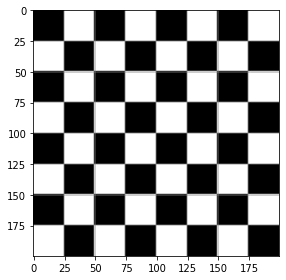

In [71]:
image = data.checkerboard()
image = np.invert(image)
io.imshow(image)
io.show()    

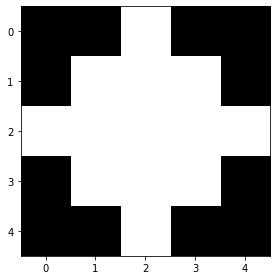

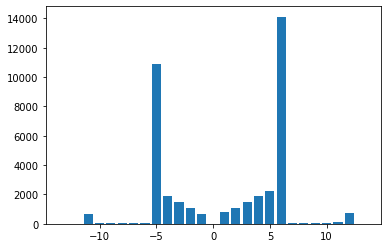

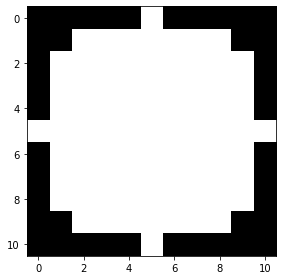

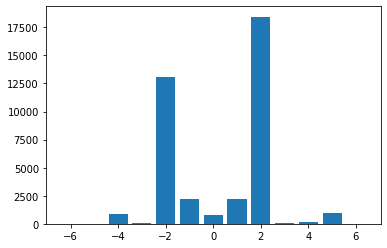

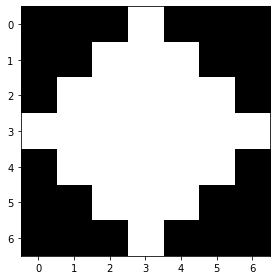

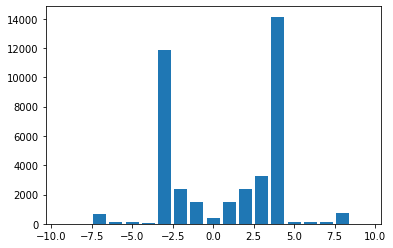

In [72]:
area_function = (lambda im: np.count_nonzero(im))
helper_function = (lambda a, b: np.logical_and(a, np.logical_not(b)))

structure = morphology.disk(2, dtype=np.bool)
io.imshow(structure)
io.show()

plot(spectrum(image, structure, area_function, helper_function))

structure = morphology.disk(5, dtype=np.bool)
io.imshow(structure)
io.show()

plot(spectrum(image, structure, area_function, helper_function))

structure = morphology.diamond(3, dtype=np.bool)
io.imshow(structure)
io.show()

plot(spectrum(image, structure, area_function, helper_function))

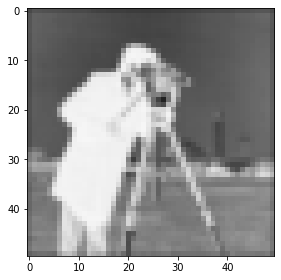

In [65]:
image = data.camera()
image = np.invert(image)
image = skimage.transform.resize(image, (50, 50), mode='constant')

io.imshow(image)
io.show()

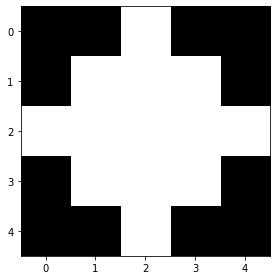

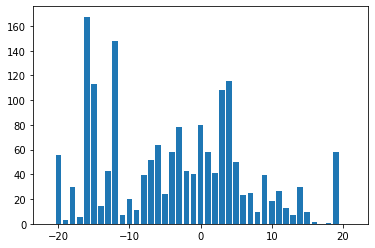

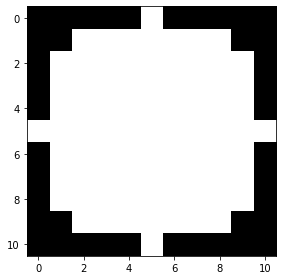

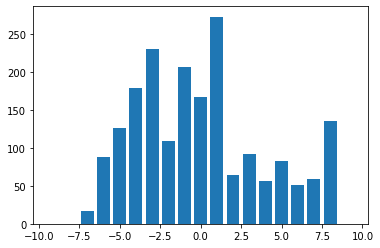

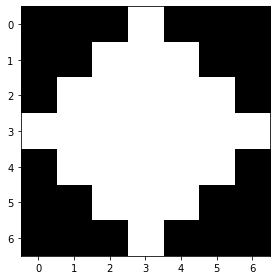

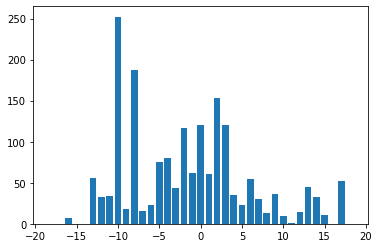

In [66]:
area_function = (lambda im: np.sum(im))
helper_function =  (lambda a, b: a - b)

structure = morphology.disk(2, dtype=np.bool)
io.imshow(structure)
io.show()

plot(spectrum(image, structure, area_function, helper_function))

structure = morphology.disk(5, dtype=np.bool)
io.imshow(structure)
io.show()

plot(spectrum(image, structure, area_function, helper_function))

structure = morphology.diamond(3, dtype=np.bool)
io.imshow(structure)
io.show()

plot(spectrum(image, structure, area_function, helper_function))